In [2]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
from powervisualisation import Trace, timeseries_plot, detect_breakout

Populating the interactive namespace from numpy and matplotlib


In [3]:
T = Trace("data/AMDSTENCIL.hdf5")
T.samplecount

15204352

In [17]:
df = T.power_as_df(total=True)
fig, (ax1, ax2) = plt.subplots(1, 2,  sharey=True)

plt.xticks(rotation=90)
ax1.plot(df.index, df.values)
plt.setp( ax1.xaxis.get_majorticklabels(), rotation=90 )
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Power [W]")
df.plot(ax=ax2, kind="hist", orientation="horizontal", bins=100)
plt.savefig("output/report/segmentation_intro.pdf")

0.0 0.03996003996


0.03996003996 1.0
(1, [40], <matplotlib.figure.Figure object at 0x1116d4b10>, [<matplotlib.figure.Figure object at 0x1123aea10>, <matplotlib.figure.Figure object at 0x1126ccdd0>])


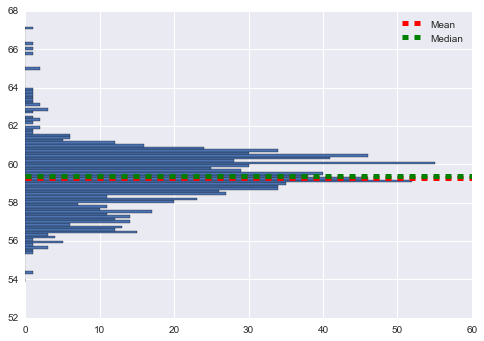

In [4]:
res = T.detect_segments()
print res
res[2].savefig("output/report/segmentation_breakouts.pdf")
for ix, fig in enumerate(res[3]):
    fig.savefig("output/report/segmentation_%s_hist.pdf" % ix)

In [5]:
df = T.power_as_df(total=True)

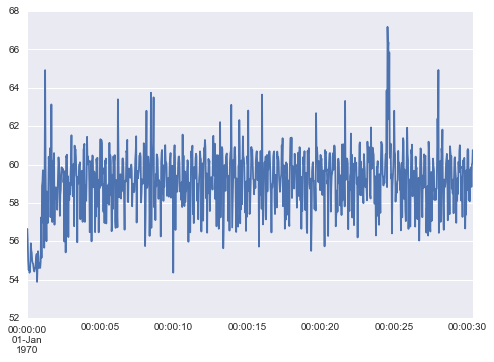

In [6]:
df.plot()

In [7]:
((df - df.mean()) / df.std() )

1970-01-01 00:00:00.000000   -1.698452
1970-01-01 00:00:00.030408   -1.531971
1970-01-01 00:00:00.060816   -1.886219
1970-01-01 00:00:00.091224   -2.548915
1970-01-01 00:00:00.121632   -2.837137
1970-01-01 00:00:00.152040   -2.799423
1970-01-01 00:00:00.182448   -2.923913
1970-01-01 00:00:00.212856   -2.888318
1970-01-01 00:00:00.243264   -2.551486
1970-01-01 00:00:00.273672   -1.988128
1970-01-01 00:00:00.304080   -2.208440
1970-01-01 00:00:00.334488   -2.292416
1970-01-01 00:00:00.364896   -2.538231
1970-01-01 00:00:00.395304   -2.616751
1970-01-01 00:00:00.425712   -2.635302
1970-01-01 00:00:00.456120   -2.767704
1970-01-01 00:00:00.486528   -2.860349
1970-01-01 00:00:00.516936   -2.885338
1970-01-01 00:00:00.547344   -2.785699
1970-01-01 00:00:00.577752   -2.784244
1970-01-01 00:00:00.608160   -2.585922
1970-01-01 00:00:00.638568   -2.413109
1970-01-01 00:00:00.668976   -2.326908
1970-01-01 00:00:00.699384   -3.215178
1970-01-01 00:00:00.729792   -2.774743
1970-01-01 00:00:00.76020

/Users/pschiffmann/anaconda/envs/PowerVisualisation/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=50,center=True).mean()
/Users/pschiffmann/anaconda/envs/PowerVisualisation/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=True,window=10).apply(args=<tuple>,func=<function>,kwargs=<dict>)


/Users/pschiffmann/anaconda/envs/PowerVisualisation/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=50,center=True).mean()


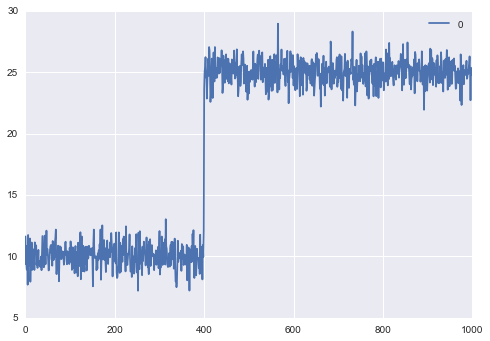

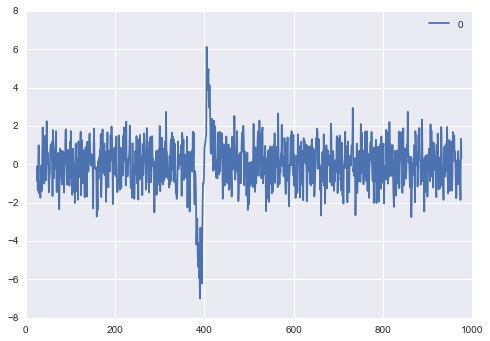

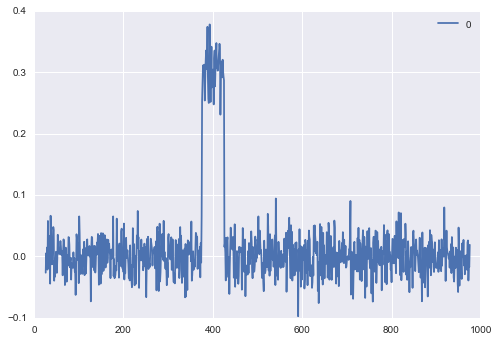

In [39]:
np.random.seed(1)
jump = [10]*400 + [25]*600
jump = pd.DataFrame(jump) + 1 * np.random.randn(1000,1)
jump.plot()
plt.savefig("output/report/seg_jump_signal.pdf")
( (jump-pd.rolling_mean(jump, 50, center=True)) / pd.rolling_apply(jump, 10, np.std, center=True)).plot()
plt.savefig("output/report/seg_jump_zscore.pdf")
pd.rolling_mean(jump.diff(), 50, center=True).plot()
plt.savefig("output/report/seg_jump_diffmean.pdf")

/Users/pschiffmann/anaconda/envs/PowerVisualisation/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=50,center=True).mean()


/Users/pschiffmann/anaconda/envs/PowerVisualisation/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=50,center=True).mean()


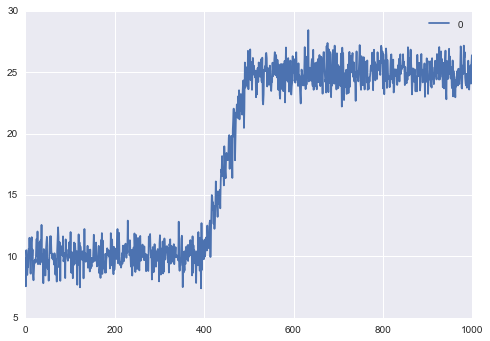

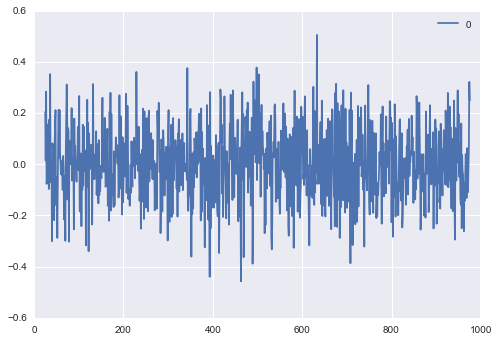

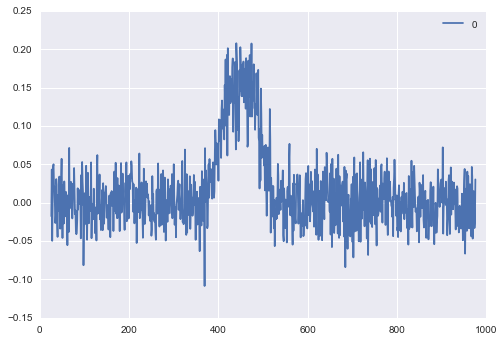

In [40]:
jump = [10]*400 + list(np.linspace(10, 25, 100)) + [25]*500
jump = pd.DataFrame(jump) + 1 * np.random.randn(1000,1)
jump.plot()
plt.savefig("output/report/seg_trend_signal.pdf")
( (jump-pd.rolling_mean(jump, 50, center=True)) / jump.std()).plot()
plt.savefig("output/report/seg_trend_zscore.pdf")
pd.rolling_mean(jump.diff(), 50, center=True).plot()
plt.savefig("output/report/seg_trend_diffmean.pdf")

/Users/pschiffmann/anaconda/envs/PowerVisualisation/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


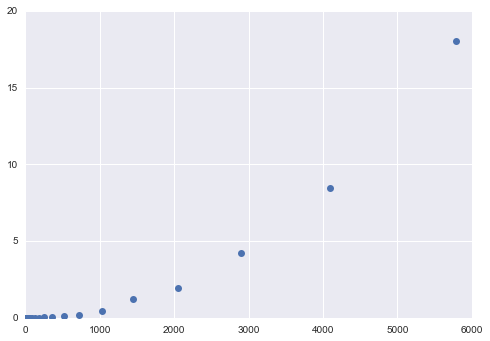

In [52]:
import breakout_detection
from powervisualisation.segmentation import rescale_list
from time import time
def time_breakout(size=100):
    t1 = time()

    data = np.random.random(size)
    edm = breakout_detection.EdmMulti()
    edm.evaluate(rescale_list(data))
    breakouts = edm.getLoc()
    return time()-t1

sizes = [np.power(2, _*0.5) for _ in range(26)]
time_breakout()
times = [time_breakout(_) for _ in sizes]

plt.plot(sizes, times, 'o')

In [56]:
plt.loglog(sizes, times, 'o')
plt.xlabel("Input length")
plt.ylabel("Runtime [s]")
plt.savefig("output/report/seg_runtime.pdf")

In [58]:
sizes

[1.0,
 1.4142135623730951,
 2.0,
 2.8284271247461903,
 4.0,
 5.6568542494923806,
 8.0,
 11.313708498984761,
 16.0,
 22.627416997969522,
 32.0,
 45.254833995939045,
 64.0,
 90.509667991878089,
 128.0,
 181.01933598375618,
 256.0,
 362.03867196751236,
 512.0,
 724.07734393502471,
 1024.0,
 1448.1546878700494,
 2048.0,
 2896.3093757400989,
 4096.0,
 5792.6187514801977]